In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import json

In [26]:
data_path = "data1.csv"
data = pd.read_csv(data_path)

# loop over rows in data 
for index, row in data.iterrows():
    print(row.keys())


Index(['workerid', 'proliferate.condition', 'trial1', 'trial10', 'trial11',
       'trial12', 'trial13', 'trial14', 'trial15', 'trial16', 'trial17',
       'trial18', 'trial19', 'trial2', 'trial20', 'trial21', 'trial22',
       'trial23', 'trial24', 'trial25', 'trial26', 'trial27', 'trial28',
       'trial29', 'trial3', 'trial30', 'trial31', 'trial32', 'trial33',
       'trial34', 'trial35', 'trial36', 'trial37', 'trial38', 'trial39',
       'trial4', 'trial40', 'trial5', 'trial6', 'trial7', 'trial8', 'trial9',
       'error'],
      dtype='object')
Index(['workerid', 'proliferate.condition', 'trial1', 'trial10', 'trial11',
       'trial12', 'trial13', 'trial14', 'trial15', 'trial16', 'trial17',
       'trial18', 'trial19', 'trial2', 'trial20', 'trial21', 'trial22',
       'trial23', 'trial24', 'trial25', 'trial26', 'trial27', 'trial28',
       'trial29', 'trial3', 'trial30', 'trial31', 'trial32', 'trial33',
       'trial34', 'trial35', 'trial36', 'trial37', 'trial38', 'trial39',
     

In [27]:
data_dict = {
    'rating': [],
    'scenario_id': [],
    'structure': [],
    'type': [],
    'strength': [],
    'subject_id': [],
    'target': [],
    'background': [],
}

for i, row in data.iterrows():


    for trial in row[2:-1]:
        trial_data = eval(trial)
        data_dict['subject_id'].append(i)
        data_dict['rating'].append(trial_data['likertResponses']['likert1'])
        print(trial_data['scenario_id'])
        data_dict['scenario_id'].append(trial_data['scenario_id'])
        data_dict['structure'].append(trial_data['structure'])
        data_dict['type'].append(trial_data['type'])
        data_dict['strength'].append(trial_data['strength'])
        data_dict['target'].append(trial_data['target'])
        data_dict['background'].append(trial_data['background'])

0
0
1
2
2
0
1
1
3
3
3
3
4
2
0
1
1
1
0
1
4
4
0
2
3
2
0
4
2
3
4
3
3
2
1
4
2
0
4
4
1
0
0
0
4
2
2
4
3
1
3
4
2
4
3
3
1
0
0
2
0
0
2
1
3
4
0
1
4
4
3
2
3
2
4
2
3
1
1
1
2
0
0
4
4
0
1
3
2
4
3
4
3
1
0
3
2
1
1
0
4
4
3
3
0
0
3
2
0
1
2
2
4
1
4
2
3
1
2
1
2
0
4
1
1
3
2
4
0
1
4
4
1
1
2
4
3
0
1
3
0
3
3
3
2
3
2
3
0
1
4
2
0
0
4
2
2
0
4
1
3
0
2
4
0
3
4
1
4
2
2
2
3
1
4
2
3
0
3
3
1
3
1
4
0
1
1
0
0
4
0
4
2
4
1
0
2
3
2
1


In [28]:

df = pd.DataFrame(data_dict)
# print(df)

# Ensure 'rating' is numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by the specified columns
grouped = df.groupby(['type', 'strength', 'structure', 'scenario_id'])
# remove harm

grouped_2 = df.groupby(['type', 'strength'])

# # Calculate the mean and standard deviation for each group
aggregated = grouped_2['rating'].agg(['mean', 'std', 'count'])

# Calculate standard error of the mean (SEM)
aggregated['sem'] = aggregated['std'] / np.sqrt(aggregated['count'])

# Drop the now unnecessary std and count columns
aggregated = aggregated.drop(['std', 'count'], axis=1).reset_index()
# aggregated

# aggregated["background"] = df.groupby(['type', 'strength', 'scenario_id', 'structure'])['background'].apply(list).reset_index()['background']
# aggregated["target"] = df.groupby(['type', 'strength', 'scenario_id', 'structure'])['target'].apply(list).reset_index()['target']
# aggregated = aggregated[aggregated["type"] != "harm"]
# aggregated_mild = aggregated[aggregated["strength"] == ""]

# # aggregated_mild.to_csv("aggregated_good_mild.csv")
# aggregated_mild
aggregated


,type,strength,mean,sem
0,good,mild,5.58,0.156727
1,good,severe,6.42,0.114607
2,harm,mild,3.56,0.192003
3,harm,severe,2.08,0.187006


<BarContainer object of 4 artists>

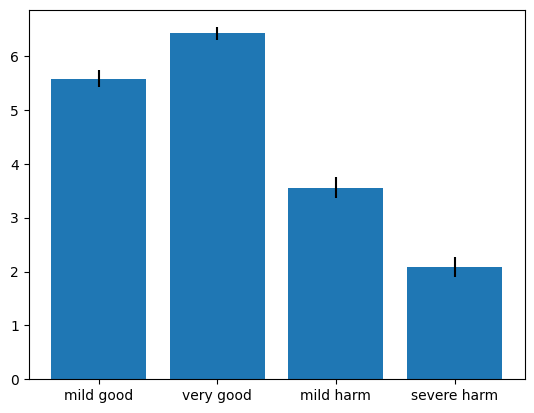

In [29]:
plt.bar(["mild good", "very good", "mild harm", "severe harm"], aggregated['mean'], yerr=aggregated['sem'])

In [55]:
[int(i) for i in list(df_mild_harm['rating'])]
[int(i) for i in list(df_severe_harm['rating'])]

[2,
 2,
 2,
 2,
 1,
 4,
 1,
 3,
 3,
 5,
 3,
 1,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 1,
 2,
 2,
 4,
 2,
 3,
 2,
 1,
 2,
 2,
 2]

In [40]:
from scipy.stats import ttest_ind, ttest_rel
ttest_rel([int(i) for i in list(df_mild_harm['rating'])], [int(i) for i in list(df_severe_harm['rating'])])

TtestResult(statistic=4.3088441102153565, pvalue=0.00017198022211953903, df=29)